# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [65]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [67]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [68]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')    


In [69]:
# Extract all rows of data.
header = soup.find_all("th")
data = soup.find_all("tr", class_="data-row")

In [54]:
# # Print and check
# for head in header:
#     print(head)

<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>


In [55]:
# # Print and check again
# for data in data:
#     print(data)

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>742.0</td>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [70]:
# Create an empty list
list1 = []

# Loop through the scraped data to create a list of rows
for newrows in data:
    rowdata = newrows.find_all("td")

    listdata = []

    for row in rowdata:
        text = row.text
        listdata.append(text)

    list1.append(listdata)

    print(listdata)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [71]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Create an empty list
titleheader = []

# Loop through the scraped data to create a list of rows
for titleinfo in header:
    title = titleinfo.text

    titleheader.append(title)

    print(titleheader)

['id']
['id', 'terrestrial_date']
['id', 'terrestrial_date', 'sol']
['id', 'terrestrial_date', 'sol', 'ls']
['id', 'terrestrial_date', 'sol', 'ls', 'month']
['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp']
['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [72]:
# Confirm DataFrame was created successfully
newdf = pd.DataFrame(list1, columns = titleheader)

newdf.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [73]:
# Examine data type of each column
newdf.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [76]:
# Change data types for data analysis
newdf = newdf.astype({"terrestrial_date": "datetime64[ns]", "sol": "int64", "ls": "int64", "month": "int64", "min_temp": "float", "pressure": "float"})

In [77]:
# Confirm type changes were successful by examining data types again
newdf.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [78]:
newdf

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [136]:
# Convert the 'terrestrial_date' column to a datetime data type
newdf['terrestrial_date'] = pd.to_datetime(newdf['terrestrial_date'])

# Extract the year and month from the 'terrestrial_date' column
newdf['year'] = newdf['terrestrial_date'].dt.year
newdf['month'] = newdf['terrestrial_date'].dt.month

# Calculate the number of unique months on Mars
unique_months_count = newdf.groupby(['year', 'month']).size().reset_index(name='count')['count'].count()

# Display the number of unique months on Mars
print(f"Number of Unique Months on Mars: {unique_months_count}")


Number of Unique Months on Mars: 67


In [86]:
# 2. How many Martian days' worth of data are there?
number_of_martian_sols = newdf['sol'].nunique()

# Display the result
print("Number of unique Martian days (sols) in the dataset:", number_of_martian_sols)


Number of unique Martian days (sols) in the dataset: 1867


In [84]:
# 3. What is the average low temperature by month?
# Calculate the average low temperature for each Martian month
average_low_temp_by_martian_month = newdf.groupby('month')['min_temp'].mean()

# Display the result
print(average_low_temp_by_martian_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


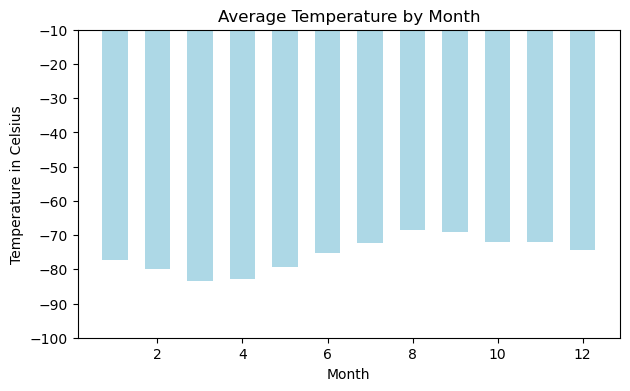

In [94]:
# Calculate the average temperature for each month
average_temp_by_month = newdf.groupby('month')['min_temp'].mean()

# Plot the average temperature by month as a bar graph
plt.figure(figsize=(7, 4))
plt.bar(average_temp_by_month.index, average_temp_by_month.values, color='lightblue', width=0.6)

# Set the y-axis limits to range from -100 to -10
plt.ylim(-100, -10)

# Label the axes
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Optionally, add a title
plt.title('Average Temperature by Month')

# Show the plot
plt.show()


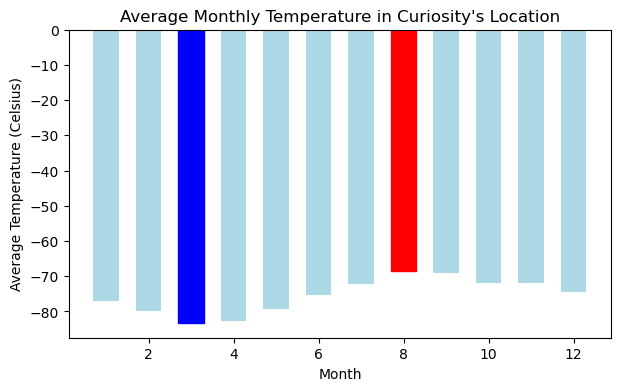

The coldest month is: 3 with an average temperature of -83.30729166666667°C
The hottest month is: 8 with an average temperature of -68.38297872340425°C


In [96]:
# Calculate the average temperature for each month
average_temp_by_month = newdf.groupby('month')['min_temp'].mean()

# Identify the coldest and hottest months
coldest_month = average_temp_by_month.idxmin()
hottest_month = average_temp_by_month.idxmax()

# Create a bar graph
plt.figure(figsize=(7, 4))
bars = plt.bar(average_temp_by_month.index, average_temp_by_month.values, color='lightblue', width=0.6)

# Highlight the coldest and hottest months in a different color, so it looks prettier :D
bars[coldest_month - 1].set_color('blue') 
bars[hottest_month - 1].set_color('red')

# Set the y-axis label
plt.ylabel('Average Temperature (Celsius)')

# Set the x-axis label
plt.xlabel('Month')

# Set the title 
plt.title('Average Monthly Temperature in Curiosity\'s Location')

# Show the plot
plt.show()

# Print out the coldest and hottest months
print(f"The coldest month is: {coldest_month} with an average temperature of {average_temp_by_month[coldest_month]}°C")
print(f"The hottest month is: {hottest_month} with an average temperature of {average_temp_by_month[hottest_month]}°C")


In [126]:
# 4. Average pressure by Martian month
# Calculate the average pressure for each month
average_pressure_by_month = newdf.groupby('month')['pressure'].mean()

# Display the result
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


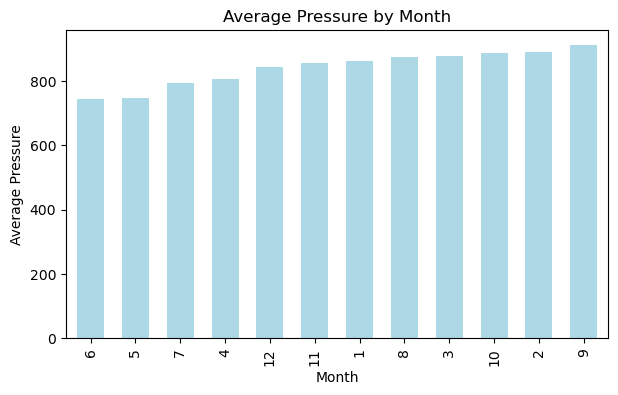

In [128]:
# Sort the average pressures in ascending order to arrange the x-axis from lowest to highest pressure
sorted_average_pressure = average_pressure_by_month.sort_values()

# Now plot the sorted data
sorted_average_pressure.plot(kind='bar', color='lightblue', figsize=(7, 4), width=0.6)

# Adding labels and title
plt.ylabel('Average Pressure')
plt.xlabel('Month')
plt.title('Average Pressure by Month')

# Displaying the plot
plt.show()


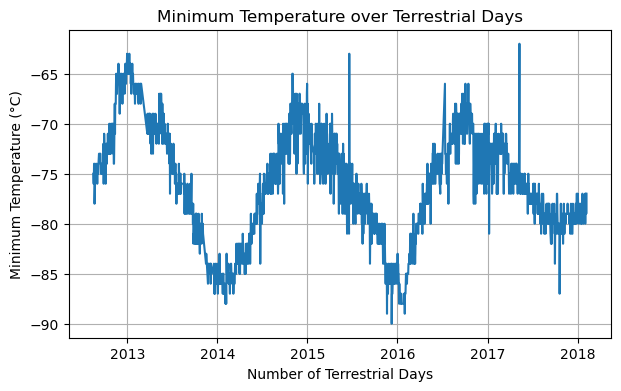

Total Terrestrial Days in the Selected Range: 1847


In [133]:
# Filter the DataFrame to select the relevant range of 'terrestrial_date' and 'min_temp'
filtered_df = newdf[(newdf['terrestrial_date'] >= newdf['terrestrial_date'].min()) & (newdf['terrestrial_date'] <= newdf['terrestrial_date'].min() + pd.Timedelta(days=2000))]
filtered_df = filtered_df[(filtered_df['min_temp'] >= -90) & (filtered_df['min_temp'] <= -60)]

# Plot the filtered data as a series plot
plt.figure(figsize=(7, 4))
plt.plot(filtered_df['terrestrial_date'], filtered_df['min_temp'])
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature over Terrestrial Days')
plt.grid(True)

# Calculate the total number of terrestrial days in the selected range
total_terrestrial_days = filtered_df.shape[0]

# Display the plot and the total number of terrestrial days
plt.show()
print(f"Total Terrestrial Days in the Selected Range: {total_terrestrial_days}")


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [134]:
# Write the data to a CSV
newdf.to_csv("marsdata.csv", index=False)

In [135]:
browser.quit()